# Statistical Data Analysis
## ADNI Alzheimer's Data
- Functions/algorithms used for calculating the statistics are in the sda module

In [1]:
# import packages
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# import wrangle_adni to import/wrangle the data
from adnidatawrangling import wrangle_adni

# import custom modules eda, sda
# eda: exploratory data analysis module for additional functions
# sda: statistical data analysis module
import eda, sda

# set seaborn defaults
sns.set()

In [2]:
# import data, clean, and extract data
adni_comp, clin_data, scan_data = wrangle_adni()

In [3]:
# extract final exam data: only the last exam for each patient
final_exam = eda.get_final_exam(adni_comp)

# calculate the change in variables over the course of the study
eda.calc_deltas(final_exam)

### Statistical Questions:
- Change in biomarkers
    - Is there a difference between males and females in the amount of change observed in biomarkers with progression towards Alzheimer's Disease (AD)?
        - Further questions will be split by males/females if a difference is found
        - Permutation sampling will be used here to test if males/females come from the same distribution with regards to the amount of change observed
    - Which biomarkers show a statistically significant change as a person develops AD?
    - In biomarkers that show a change, what amount of change is correlated with progression towards AD?
- Biomarker baseline values as predictors of AD
    - Are there statistically significant thresholds for baseline values of a biomarker that suggest a person will develop AD?
        - How does this vary when including/excluding certain diagnosis groups?
            1. Looking at the entire sample of patients (all baseline diagnoses, including those with AD already)
            2. Only patients that were cognitively normal (CN) or had mild cognitive impairment (MCI) at baseline
            3. Including only patients that were CN at baseline
        - Exploratory data analysis suggests that there may be different thresholds for different genders

#### Change in Biomarkers
- From the exploratory data analysis, the following biomarkers were revealed as good candidates for statistical analysis
    - Clinical tests: CDRSB, ADAS11, ADAS13, MMSE, RAVLT_immediate
    - Brain scans: Hippocampus, Ventricles, WholeBrain, Entorhinal, MidTemp
- Approach
    - As sample sizes are not very large, bootstrapping will be used to generate a distribution for the change in each biomarker for patients that showed no change in diagnosis during the study
    - The null hypothesis is that when patients are divided into groups based on their change in diagnosis (CN to MCI, MCI to AD, CN to AD) all groups will have the same distribution as the group that ended the study with no change
        - May have to examine whether patients with no change in diagnosis that are not CN (MCI to MCI and AD to AD) impact the results
    - The alternative hypothesis is that the distributions for each group will be different enough that threshold values can be identified to signify beginning early treatment for MCI/AD or raising concerns about progression to AD
        - The goal of this analysis to produce confidence intervals for each diagnosis group
            - This will be used to identify an amount of change that should be of concern
            - There is less of a focus on obtaining p-values for this analysis

#### Changes in CDRSB
- Test for Differences Between Genders

A permutation test reveals that males/females should not be divided when analyzing changes in CDRSB. The observed difference between the mean change for males and mean change for females is nearly 0, which is what is expected under the null hypothesis that they come from the same distribution.

Distribution Test for Males/Females
Variable:  CDRSB_delta
If p < 0.05, then split the data by gender
p-value:  0.4374


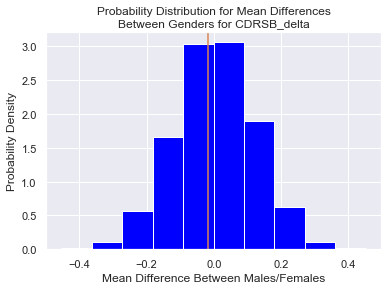

In [4]:
# function parameters are: dataframe, biomarker, number of permutations

sda.test_gender_effect(final_exam, 'CDRSB_delta', 10000)

#### Changes in ADAS11
- Test for Differences Between Genders

Results of the permutations test suggest that ADAS11 analysis should be split by gender. Running the test multiple times consistently produces p-values < 0.05, suggesting there is less than a 5% probability that the changes in ADAS11 observed during this study are the same between males and females. 

Distribution Test for Males/Females
Variable:  ADAS11_delta
If p < 0.05, then split the data by gender
p-value:  0.0442


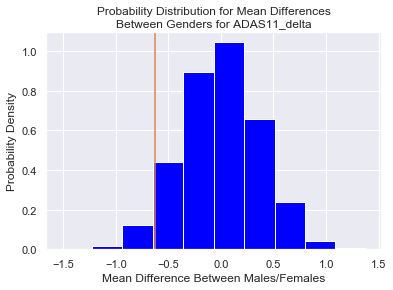

In [5]:
# function parameters are: dataframe, biomarker, number of permutations

sda.test_gender_effect(final_exam, 'ADAS11_delta', 10000)

#### Changes in ADAS13
- Test for Differences Between Genders

The permutations test for ADAS13 changes did not have a significant p-value, but it was very close. Because the p-value was about 0.07 and because I'm splitting ADAS11 by gender, I will also split ADAS13 by gender. I may look at what happens when not split by gender to see if there is any substantial difference in outcomes.

Distribution Test for Males/Females
Variable:  ADAS13_delta
If p < 0.05, then split the data by gender
p-value:  0.079


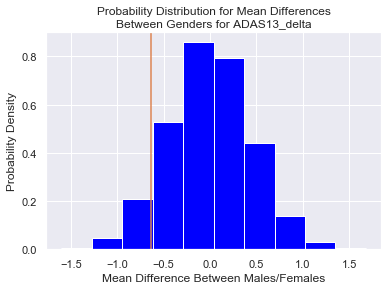

In [6]:
# function parameters are: dataframe, biomarker, number of permutations

sda.test_gender_effect(final_exam, 'ADAS13_delta', 10000)

#### Changes in MMSE
- Test for Differences Between Genders

A permutation test suggests that males and females should not be separated for analysis. Probabilities of 0.11 to 0.13 were common, suggesting that there might be a difference in the mean changes observed between males and females, but there is enough uncertainty to keep males/females together. There was only a 16% difference between the means compared to the global mean with males/females grouped together.

Distribution Test for Males/Females
Variable:  MMSE_delta
If p < 0.05, then split the data by gender
p-value:  0.1222


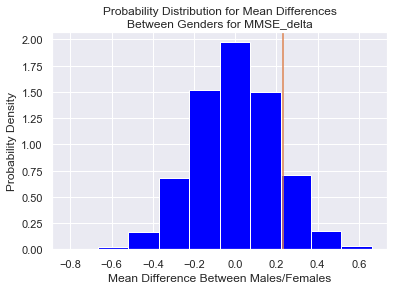

In [7]:
# function parameters are: dataframe, biomarker, number of permutations

sda.test_gender_effect(final_exam, 'MMSE_delta', 10000)

In [8]:
fe_males, fe_females = sda.divide_genders(final_exam)

In [9]:
print('mean MMSE_delta for males: ', np.mean(fe_males.MMSE_delta))
print('mean MMSE_delta for females: ', np.mean(fe_females.MMSE_delta))
print('percent difference between means: ', 
      (np.mean(fe_females.MMSE_delta)-np.mean(fe_males.MMSE_delta))/np.mean(final_exam.MMSE_delta))


mean MMSE_delta for males:  -1.3348909657320873
mean MMSE_delta for females:  -1.566287878787879
percent difference between means:  0.160768639118335


#### Changes in RAVLT_immediate
- Test for Differences Between Genders

A permutation test for differences in RAVLT_immediate changes between genders suggests that the data can be considered together rather than being split by gender. The p-values around 0.16-0.17, suggest that observed mean differences in RAVLT_immediate changes could possibly be due to random chance.

Distribution Test for Males/Females
Variable:  RAVLT_delta
If p < 0.05, then split the data by gender
p-value:  0.1553


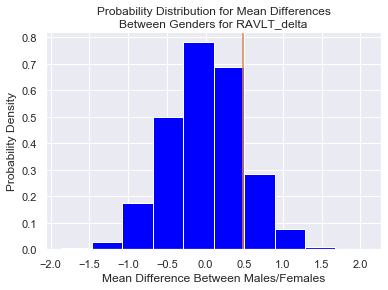

In [10]:
# function parameters are: dataframe, biomarker, number of permutations

sda.test_gender_effect(final_exam, 'RAVLT_delta', 10000)

#### Summary of Gender Analysis on Changes in Clinical Biomarkers
ADAS11 and ADAS13 changes will be divided by gender when searching for correlation with progression to Alzheimer's Disease. CDRSB, MMSE, and RAVLT_immediate changes will use the combined dataset for males/females.

#### Changes in Hippocampus
- Test for Differences Between Genders

A permutation test suggests that males/females should not be separated when analyzing changes in Hippocampus volume. The p-value was large enough that there is too much uncertainty to divide the data by gender.

Distribution Test for Males/Females
Variable:  Hippocampus_delta
If p < 0.05, then split the data by gender
p-value:  0.2236


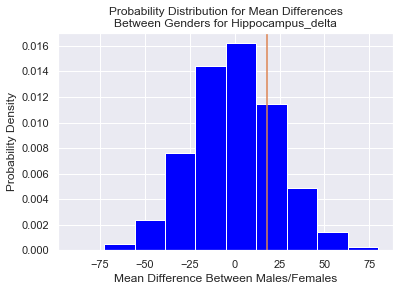

In [11]:
# function parameters are: dataframe, biomarker, number of permutations

sda.test_gender_effect(final_exam, 'Hippocampus_delta', 10000)

#### Changes in Ventricles
- Test for Differences Between Genders

Results from the permutations test on changes in ventricles reveal that there is a difference in the observed amount of change between males/females in the ADNI data. Therefore, the data will be divided by gender for analysis of changes in ventricles relating to a change in diagnosis.

Distribution Test for Males/Females
Variable:  Ventricles_delta
If p < 0.05, then split the data by gender
p-value:  0.0004


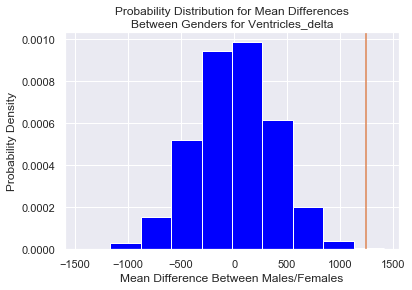

In [12]:
# function parameters are: dataframe, biomarker, number of permutations

sda.test_gender_effect(final_exam, 'Ventricles_delta', 10000)

#### Changes of WholeBrain
- Test for Differences Between Genders

Results from the permutation test suggest that the data should not be divided by gender for analysis of changes in WholeBrain relating to change in diagnosis. The probability is too high that the observed difference between males/females is random chance to split the data by gender.

Distribution Test for Males/Females
Variable:  WholeBrain_delta
If p < 0.05, then split the data by gender
p-value:  0.1897


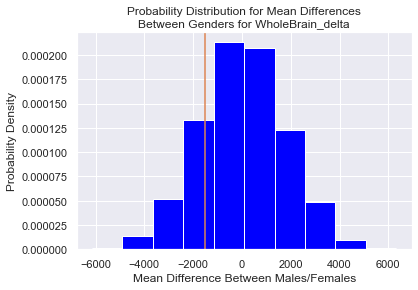

In [13]:
# function parameters are: dataframe, biomarker, number of permutations

sda.test_gender_effect(final_exam, 'WholeBrain_delta', 10000)

#### Changes in Entorhinal
- Test for Differences Between Genders

The test for difference between males/females for changes in Entorhinal does not have a great enough probability to warrant separating the data by gender. It may be that a difference would have been found with a larger sample size, but there is not enough confidence to split the data by gender.

Distribution Test for Males/Females
Variable:  Entorhinal_delta
If p < 0.05, then split the data by gender
p-value:  0.1315


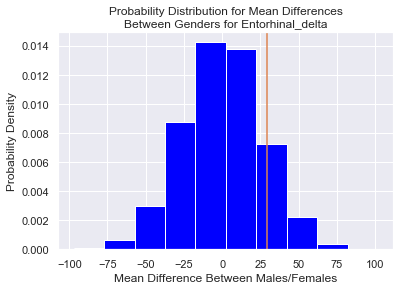

In [14]:
# function parameters are: dataframe, biomarker, number of permutations

sda.test_gender_effect(final_exam, 'Entorhinal_delta', 10000)

#### Change in MidTemp
- Test for Differences Between Genders

The permutations test for differences between genders for MidTemp changes consistently produces a p-value < 0.05. Therefore the data will be split by gender when looking for a correlation with progression towards AD.

Distribution Test for Males/Females
Variable:  MidTemp_delta
If p < 0.05, then split the data by gender
p-value:  0.0379


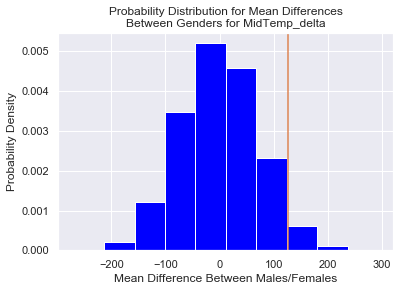

In [15]:
# function parameters are: dataframe, biomarker, number of permutations

sda.test_gender_effect(final_exam, 'MidTemp_delta', 10000)

#### Summary of the Effect of Gender on Change in Biomarkers from Scan Data

The data for changes in Ventricles and MidTemp will be split by gender, while the Hippocampus, WholeBrain, and Entorhinal data will contain data from both genders.

#### Using Change in Biomarkers to Predict a Change in Diagnosis

Bootstrap distributions were created for each diagnosis group. These were used to find confidence intervals that will be useful in predicting whether or not a given change in a specific biomarker indicates a progression towards AD. 

In [16]:
# divide data into groups based on change in diagnosis
# groups were identified in the first part of this analysis that need to be split by gender
# those are ADAS11, ADAS13, Ventricles, and MidTemp (divided by gender)

no_change, cn_mci, mci_ad, cn_ad = sda.get_deltadx_groups(final_exam)
m_no_change, m_cn_mci, m_mci_ad, m_cn_ad = sda.get_deltadx_groups(fe_males)
f_no_change, f_cn_mci, f_mci_ad, f_cn_ad = sda.get_deltadx_groups(fe_females)

#### Changes CDRSB for Predicting Change in Diagnosis

Analysis of CDRSB suggests that a change in CDRSB of 0.60 is worth noting concern. In fact, over 95% of people with a change in CDRSB greater than the threshold value of about 0.60 developed AD during the study, including 100% of the people that went from CN to AD. This threshold value was less effective at detecting progression from CN to MCI, with only 46% of patients that progressed from CN to MCI having a change in CDRSB of at least 0.60. Only about 4% of patients with a change in CDRSB of 0.60 or more ended the study as CN.

95% Confidence Interval:  0.4181086244541485  to  0.6026337336244538


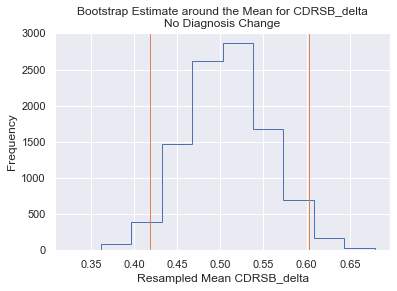

In [17]:
# calculate the confidence interval for patients with no change in diagnosis
CDRSB_delta_conf = sda.bs(no_change, 'CDRSB_delta', 10000)

In [18]:
# calc percent in each diagnosis group beyond threshold
# supply the full final_exam data, the biomarker, and the confidence level of interest

sda.eval_bs(final_exam, 'CDRSB_delta', CDRSB_delta_conf)

Percent exceeding threshold that ended CN:  3.63 %
Percent exceeding threshold that ended MCI:  27.12 %
Percent exceeding threshold that ended AD:  69.25 %
Percent progressing CN to MCI exceeding threshold:  45.95 %
Percent Progressing MCI to AD exceeding threshold:  95.45 %
Percent Progressing CN to AD exceeding threshold:  100.0 %


#### Change in ADAS11 for Males

The threshold value for males appears to be an increase of about 1.69 for ADAS11. This would be a very rare case for someone that didn't experience a diagnosis change, while 57% of male patients that progressed from CN to MCI had an ADAS11 change of at least 1.69. More than 80% of all males that developed AD had an ADAS11 increase of at least 1.69, while every male patient that progressed from CN to AD had an ADAS11 change at least this high. About 15% of males patients with ADAS11 change exceeding the threshold ended the study with a CN diagnosis. For this reason, it would be suggested to use this threshold along with other biomarkers to predict a diagnosis.

95% Confidence Interval:  0.7417248995983932  to  1.6896315261044177


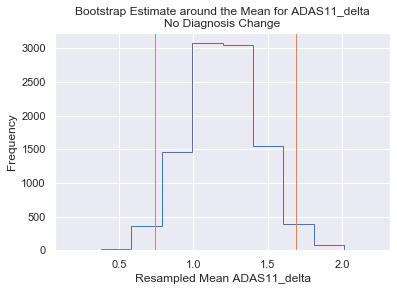

In [19]:
# calculate the confidence interval for patients with no change in diagnosis
m_adas11_conf = sda.bs(m_no_change, 'ADAS11_delta', 10000)

In [20]:
# calc percent in each diagnosis group beyond threshold
# supply the full final_exam data, the biomarker, and the confidence level of interest

sda.eval_bs(final_exam, 'ADAS11_delta', m_adas11_conf, gender='males')

Percent exceeding threshold that ended CN:  14.53 %
Percent exceeding threshold that ended MCI:  35.29 %
Percent exceeding threshold that ended AD:  50.17 %
Percent progressing CN to MCI exceeding threshold:  57.14 %
Percent Progressing MCI to AD exceeding threshold:  80.58 %
Percent Progressing CN to AD exceeding threshold:  100.0 %


#### Change in ADAS11 for Females

Females displayed a higher threshold for ADAS11 change than males. The threshold value for females is about 2.05 compared to males 1.69. An ADAS11 change of 2.05 or more for females was observed in 85% or more for patients that developed AD, with 100% of female patients that progressed from CN to AD having changes above this threshold. About 50% of females that progressed from CN to MCI had an ADAS11 change of at least 2.05. About 14% of females that had an ADAS11 change at or above threshold ended the study as CN. Additional biomarkers should probably be considered along with ADAS11 changes for females given this result.

95% Confidence Interval:  1.1323271531100472  to  2.0695215311004773


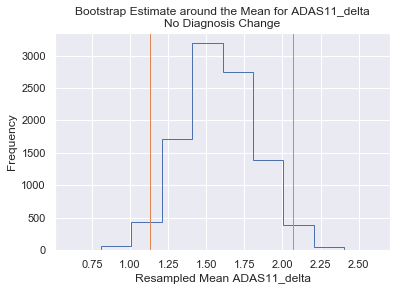

In [21]:
# calculate the confidence interval for patients with no change in diagnosis
f_adas11_conf = sda.bs(f_no_change, 'ADAS11_delta', 10000)

In [22]:
# calc percent in each diagnosis group beyond threshold
# supply the full final_exam data, the biomarker, and the confidence level of interest

sda.eval_bs(final_exam, 'ADAS11_delta', f_adas11_conf, gender='females')

Percent exceeding threshold that ended CN:  14.35 %
Percent exceeding threshold that ended MCI:  27.35 %
Percent exceeding threshold that ended AD:  58.3 %
Percent progressing CN to MCI exceeding threshold:  50.0 %
Percent Progressing MCI to AD exceeding threshold:  84.93 %
Percent Progressing CN to AD exceeding threshold:  100.0 %


# Change in ADAS13 for Males

The threshold for experiencing a diagnosis change for change in ADAS13 for males was 2.12. About 52% of males that progressed from CN to MCI displayed a change of at least 2.12, while about 80% of males who progressed from MCI to AD exhibited an ADAS13 change of at least 2.12, with 100% of males that progressed from CN to AD displaying a change of at least 2.12. About 12% of males with ADAS13 changes exceeding the threshold ended the study as CN. Therefore this threshold should probably be considered with other biomarkers when trying to predict a diagnosis.

95% Confidence Interval:  1.032207831325302  to  2.1245035140562236


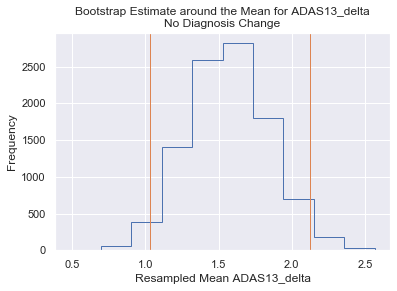

In [23]:
# calculate the confidence interval for patients with no change in diagnosis
m_adas13_conf = sda.bs(m_no_change, 'ADAS13_delta', 10000)

In [24]:
# calc percent in each diagnosis group beyond threshold
# supply the full final_exam data, the biomarker, and the confidence level of interest

sda.eval_bs(final_exam, 'ADAS13_delta', m_adas13_conf, gender='males')

Percent exceeding threshold that ended CN:  12.14 %
Percent exceeding threshold that ended MCI:  37.86 %
Percent exceeding threshold that ended AD:  50.0 %
Percent progressing CN to MCI exceeding threshold:  52.38 %
Percent Progressing MCI to AD exceeding threshold:  79.61 %
Percent Progressing CN to AD exceeding threshold:  100.0 %


#### Change in ADAS13 for Females

Similar to ADAS11, females had a higher threshold for ADAS13 changes that are associated with a change in diagnosis. 100% of females who progressed from CN to AD had an ADAS13 change of at least 2.40, with about 89% of females who progressed from MCI to AD above this threshold as well. It is important to note that nearly 63% of females who only progressed from CN to MCI displayed a change in ADAS13 above the threshold, suggesting a change in ADAS13 of 2.4 or more alone is not enough to strongly predict a progression to AD. This is especially true when considering about 19% of females with ADAS13 changes exceeding the threshold ended the study with a CN diagnosis.

95% Confidence Interval:  1.2696393540669857  to  2.3989204545454537


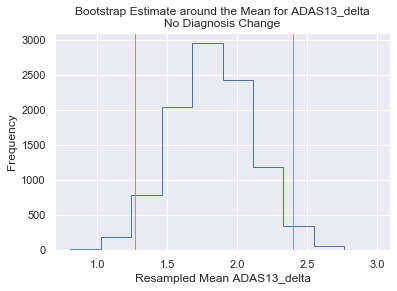

In [25]:
# calculate the confidence interval for patients with no change in diagnosis
f_adas13_conf = sda.bs(f_no_change, 'ADAS13_delta', 10000)

In [26]:
sda.eval_bs(final_exam, 'ADAS13_delta', f_adas13_conf, gender='females')

Percent exceeding threshold that ended CN:  19.33 %
Percent exceeding threshold that ended MCI:  26.47 %
Percent exceeding threshold that ended AD:  54.2 %
Percent progressing CN to MCI exceeding threshold:  62.5 %
Percent Progressing MCI to AD exceeding threshold:  89.04 %
Percent Progressing CN to AD exceeding threshold:  100.0 %


#### Changes in MMSE

MMSE analysis for males/females points to a threshold change of about -1.01 for progression. While this change is extremely rare for patients that displayed no change in diagnosis, 100% of patients that progressed from CN to AD during the study exhibited an MMSE change at least this large, while about 84% of patients that progressed from MCI to AD also displayed a change this large. Only about 27% of patients that progressed from CN to MCI had an MMSE change of -1.01 or larger, suggesting this is an ok indicator of progression to AD. About 15% of patients with an MMSE change exceeding threshold ended the study as CN. This measure should probably be considered with other biomarkers for this reason.

95% Confidence Interval:  -1.0087336244541485  to  -0.6528384279475983


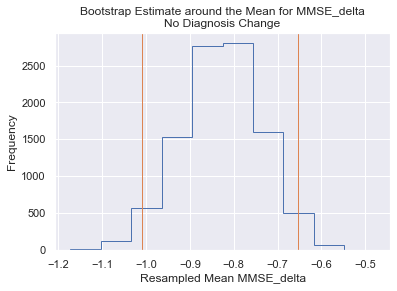

In [27]:
# calculate the confidence interval for patients with no change in diagnosis
mmse_conf = sda.bs(no_change, 'MMSE_delta', 10000)

In [28]:
sda.eval_bs(final_exam, 'MMSE_delta', mmse_conf)

Percent exceeding threshold that ended CN:  14.89 %
Percent exceeding threshold that ended MCI:  28.0 %
Percent exceeding threshold that ended AD:  57.11 %
Percent progressing CN to MCI exceeding threshold:  27.03 %
Percent Progressing MCI to AD exceeding threshold:  83.52 %
Percent Progressing CN to AD exceeding threshold:  100.0 %


#### Change in RAVLT_immediate

Males and females were analyzed together for RAVLT_immediate. The threshold for RAVLT_immediate change was -1.90 for males/females. For patients progressing from CN to AD, 100% were above this threshold, while about 74% of patients that progressed from MCI to AD showed RAVLT_immediate changes at least this large. Nearly 60% of patients that progressed from CN to MCI displayed a RAVLT_immediate change of at least -1.90, suggesting this threshold is good at predicting a change in diagnosis, but not necessarily good for predicting AD when considered alone. About 23% of patients that exceeded this change in RAVLT threshold ended the study with a CN diagnosis.

95% Confidence Interval:  -1.925791484716157  to  -0.9006277292576422


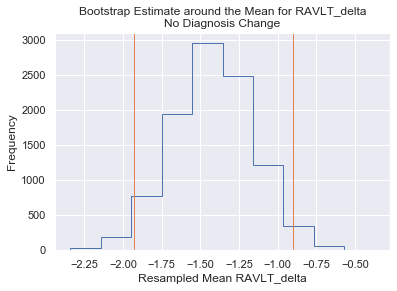

In [29]:
# calculate the confidence interval for patients with no change in diagnosis
ravlt_conf = sda.bs(no_change, 'RAVLT_delta', 10000)

In [30]:
sda.eval_bs(final_exam, 'RAVLT_delta', ravlt_conf)

Percent exceeding threshold that ended CN:  23.44 %
Percent exceeding threshold that ended MCI:  35.41 %
Percent exceeding threshold that ended AD:  41.15 %
Percent progressing CN to MCI exceeding threshold:  59.46 %
Percent Progressing MCI to AD exceeding threshold:  74.43 %
Percent Progressing CN to AD exceeding threshold:  100.0 %


#### Change in Hippocampus

Hippocampus changes had a threshold value of about -281. When evaluating this threshold, it appears that many patients progress to AD with hippocampus changes lower than this threshold. Exactly 80% of patients that progressed from CN to AD had a hippocampus change of at least -281, with about 77% of patients that progressed from MCI to AD with a change above the threshold, and nearly 60% of patients that went from CN to MCI were above this threshold. About 26% of patients exceeding this threshold ended the study with a CN diagnosis, suggesting other biomarkers should be included if using change in Hippocampus to predict progression to AD.

95% Confidence Interval:  -280.6345796943231  to  -236.7240993449782


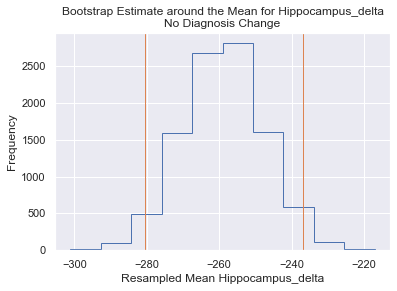

In [31]:
# calculate the confidence interval for patients with no change in diagnosis
hippo_conf = sda.bs(no_change, 'Hippocampus_delta', 10000)

In [32]:
sda.eval_bs(final_exam, 'Hippocampus_delta', hippo_conf)

Percent exceeding threshold that ended CN:  26.22 %
Percent exceeding threshold that ended MCI:  32.87 %
Percent exceeding threshold that ended AD:  40.91 %
Percent progressing CN to MCI exceeding threshold:  59.46 %
Percent Progressing MCI to AD exceeding threshold:  77.27 %
Percent Progressing CN to AD exceeding threshold:  80.0 %


go back and comment on percent ending greater than threshold, also restart and rerun the kernel

In [ ]:
Ventricles divide by gender

In [ ]:
WholeBrain

In [ ]:
Entorhinal

In [ ]:
MidTemp divide by gender

#### Baseline Values for Predicting Alzheimer's Disease
- From the exploratory data analysis, the following biomarkers emerged as good candidates for statistical testing
    - Clinical tests: ADAS11 and ADAS13
    - Brain scans: Hippocampus and MidTemp
- Approach
    - The data will be divided by final diagnosis into two groups: those that ended the study with AD and those that didn't
    - Because the sample sizes are relatively small, bootstrap distributions will be generated for each group
    - The null hypothesis is that both the group that ended with AD and the non AD group will have the same distribution of baseline values
    - The alternative hypothesis is that the group that ended the study with AD will have a different baseline distribution for the analyzed biomarkers
        - Again, 'statistical significance' of p < 0.05 is not necessarily needed to find value in using baseline values for a biomarker to predict progression to AD
        - Intead, the probability of having certain baseline values will be examined, taking into account the probability that someone will not progress to AD with a certain baseline value and the probability that someone will progress to AD with their observed baseline value